In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
from tensorflow.keras.utils import image_dataset_from_directory


2023-04-24 14:40:11.889659: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
! pwd
! ls ../data/

/home/louis/code/JammyNinja/Sandbox/chess_pieces_first/notebooks
chess_pieces_images


In [3]:
#gotta load the data in data/chess_pieces_images
path_to_dataset = os.path.join("..","data","chess_pieces_images")
img_size = 200 #?
my_seed = 69 
val_split = 0.2

In [4]:
class_names = ["bishop", "knight", "pawn", "queen", "rook"]

In [5]:
X_train = image_dataset_from_directory(
        path_to_dataset,
        #label_mode="int",
        labels='inferred',
        class_names = class_names,
        color_mode="rgb",
        seed=my_seed,
        subset="training",
        validation_split=val_split,
        image_size=(img_size, img_size),
        batch_size=16,
        shuffle=True
        )

X_test = image_dataset_from_directory(
        path_to_dataset,
        #label_mode="int",
        labels='inferred',
        class_names = class_names,
        color_mode="rgb",
        seed=my_seed,
        subset="validation",
        validation_split=val_split,
        image_size=(img_size, img_size),
        batch_size=16,
        shuffle=False
        )

Found 651 files belonging to 5 classes.
Using 521 files for training.
Found 651 files belonging to 5 classes.
Using 130 files for validation.


In [6]:
X_train.class_names
#type(X_train.get_single_element())
print(X_train.options())

test label: [1 1 4 4 1 1 0 1 0 3 0 4 2 3 3 2]
first test label: 1
first test label human: knight


Text(0.5, 1.0, 'knight')

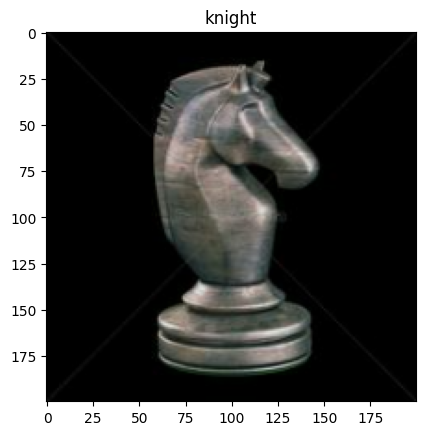

In [7]:
count = 0
test_image, test_label = None, None

for image, label in X_train.as_numpy_iterator():#.take(1):
    if count == 0 :
        test_image = image#.numpy()
        test_label = label#.numpy()
    count+=1
    if count > 0: break
    
#if you want to see an image
print("test label:", test_label)
print("first test label:", test_label[0])
print("first test label human:", X_train.class_names[test_label[0]])

plt.imshow(test_image[0]/255)
plt.title(X_train.class_names[test_label[0]])

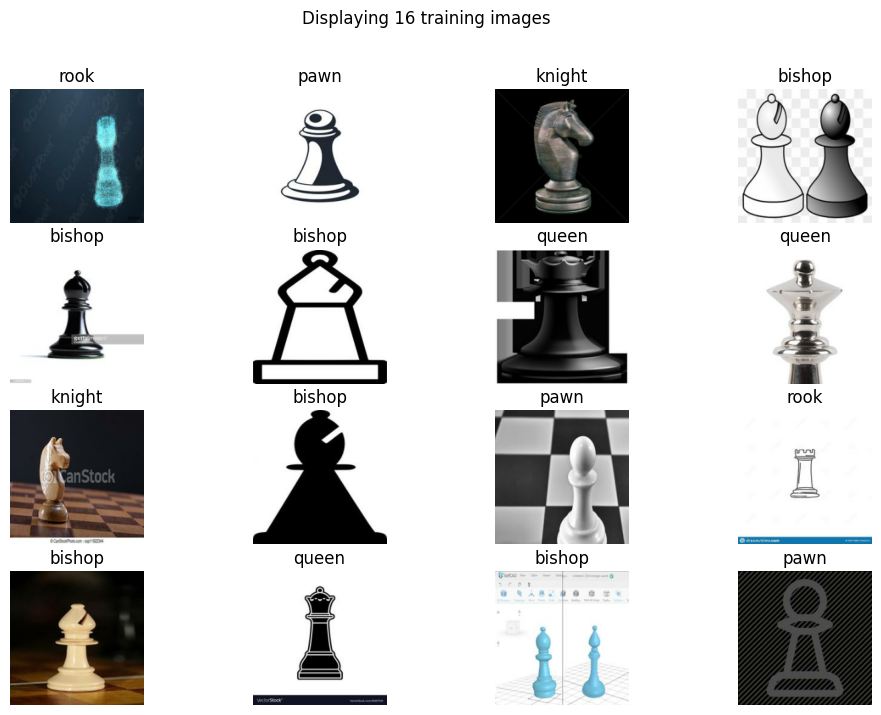

In [28]:
def show_batch_images(image_batch_in, N=8, num_cols=4):
    
    #see how many batches we will need
    batch_size = 0
    batches = 1
    for batch, labels in image_batch_in:
        batch_size = batch.shape[0]
    if N > batch_size:
        batches = ceil(N/batch_size)
    
    #collect images from batch
    images_to_show, labels_to_show = [],[]
    for image_batch, label_batch in image_batch_in.take(batches).as_numpy_iterator():
        #print(image.shape)
        for image, label in zip(image_batch, label_batch):
            if len(labels_to_show) < N:
                images_to_show.append(image)
                labels_to_show.append(label)
    
    num_cols = 4
    num_rows = ceil(N/num_cols)
    
    #now display them     
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(num_cols*3,num_rows*2))
    fig.suptitle(f"Displaying {N} training images")
    
    for i, image in enumerate(labels_to_show):
        x = i % num_cols
        y = i // num_cols
        axs[y,x].axis('off')
        axs[y,x].imshow(images_to_show[i]/255)
        axs[y,x].set_title(f"{X_train.class_names[labels_to_show[i] ]}")
    
show_batch_images(X_train, N=16)

In [ ]:
in_shape = test_image[0].shape
in_shape


In [ ]:
#load image with PIL, check natural size?